In [111]:
!pip install alibi

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from alibi.explainers import ALE
from alibi.explainers.ale import plot_ale
from sklearn.inspection import permutation_importance
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from lime.lime_tabular import LimeTabularExplainer




In [113]:
df = pd.read_csv("/content/data.csv")
df

,Unnamed: 0.1,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days,Hights_Sales
0,0,0,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-1.905541,-0.852755,-0.957784,0.901562,0.0,0.690145,-0.522427,1
1,1,1,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-0.747025,-0.348194,-0.957784,0.901562,0.0,0.690145,-0.522427,1
2,2,2,0.705444,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.660927,1.521192,-1.252827,0.0,0.690145,1.756472,1
3,3,3,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,1.670048,-0.957784,0.901562,0.0,-0.254709,0.617023,1
4,4,4,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,1.570008,2.174609,0.143983,0.901562,0.0,-0.254709,0.617023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,4105,1704,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.782308,0.0,0.690145,1.756472,0
4106,4106,603,-0.203147,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,0.156366,-0.957784,-0.653045,0.0,0.690145,0.617023,0
4107,4107,504,0.705444,0.470057,0.0,0.090866,0.609512,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.435775,0.0,0.690145,0.617023,0
4108,4108,1758,0.705444,0.470057,0.0,0.090866,0.609512,0.0,0.345650,0.0,0.411492,-0.852755,0.143983,-1.053761,0.0,0.217718,1.186748,0


In [114]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
median_sales = df['Hights_Sales'].median()
df['Sales'] = (df['Hights_Sales'] >= median_sales).astype(int)

In [115]:
X = df.drop(['Hights_Sales','Sales'], axis=1)
y = df['Sales']

In [116]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [117]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [118]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [119]:
# Create an SVR model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [120]:
# Predict and evaluate the model
y_pred = svm_model.predict(X_test)

In [121]:
# Use regression metrics for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [122]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error: 0.053947054182157624
R-squared: 0.7833447570030789
Mean Absolute Error (MAE): 0.16671540574014496


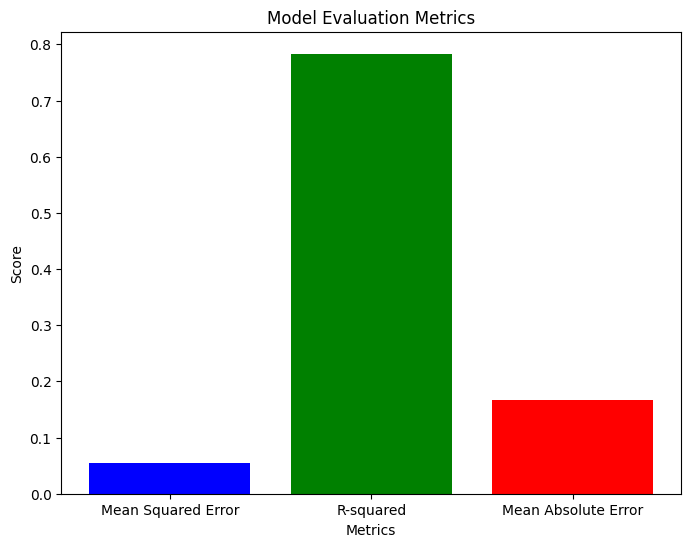

In [123]:
metrics = {
    'Mean Squared Error': mse,
    'R-squared': r2,
    'Mean Absolute Error': mae
}

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()


# Feature Importance using Permutation Importance:

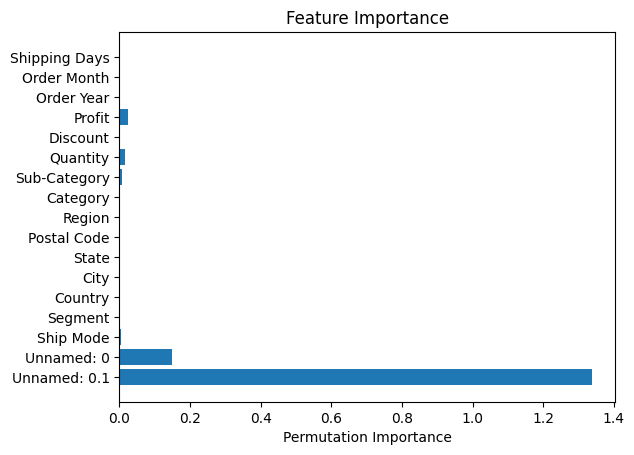

In [124]:
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Plot the feature importance
plt.barh(X.columns, importance)
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()

# Partial Dependence Plots (PDPs):

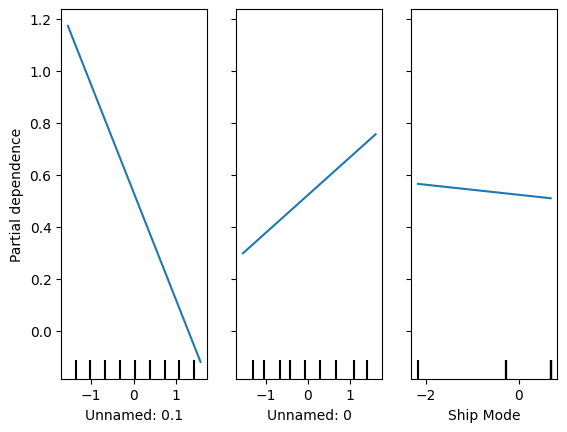

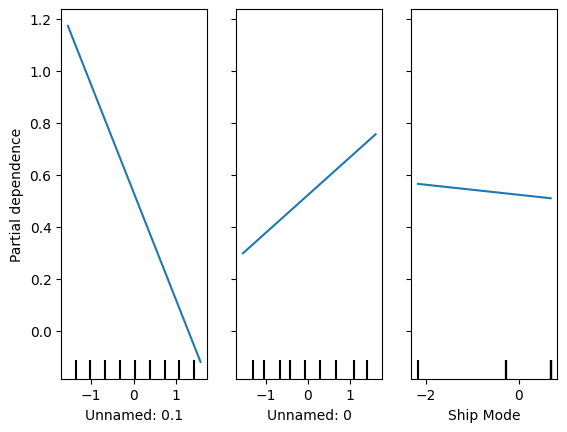

In [125]:
# Create the Partial Dependence Display object
display = PartialDependenceDisplay.from_estimator(
    svm_model, X_train, features=[0, 1, 2], feature_names=X.columns
)

# Plot the partial dependence
display.plot()
plt.show()

# SHAP (Shapley Additive Explanations):

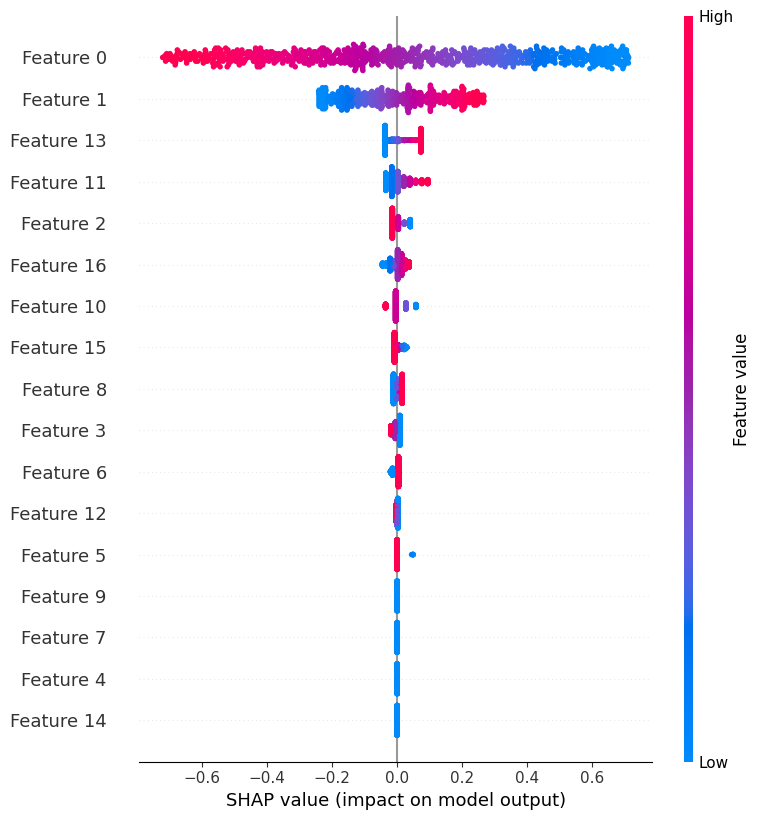

In [126]:
explainer = shap.Explainer(svm_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.initjs()
# Directly use numpy indexing
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test[0,:])

# LIME (Local Interpretable Model-agnostic Explanations):

In [127]:
!pip install lime

In [128]:
explainer = LimeTabularExplainer(X_train, training_labels=y_train, mode="regression")
explanation = explainer.explain_instance(X_test[0], svm_model.predict)
explanation.show_in_notebook()


# ALE Plots

In [129]:
proba_fun_svm = svm_model.predict

In [130]:
# Store the columns name before scaling
X_train_columns = X_encoded.columns.tolist()
ale_rf = ALE(
    proba_fun_svm,
    feature_names=X_train_columns,
    target_names=["target"]
)
exp_rf = ale_rf.explain(X_train)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.



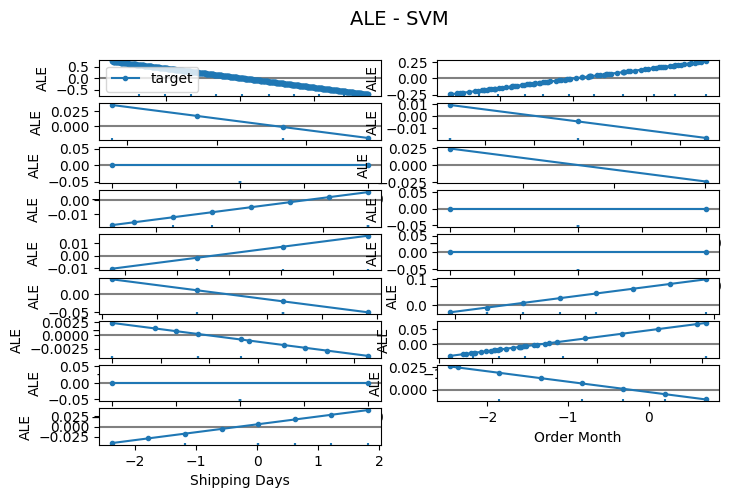

In [131]:
plot_ale(exp_rf, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5}, sharey=None)
plt.suptitle("ALE - SVM", fontsize=14)
plt.show()

ice for SVM

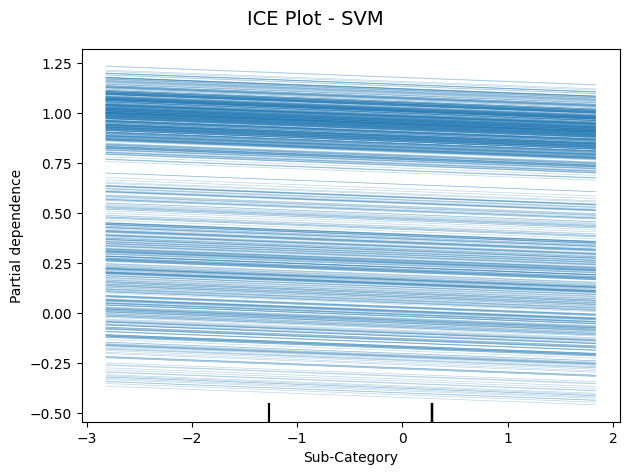

In [132]:
feature_idx = [10]

PartialDependenceDisplay.from_estimator(
    svm_model,
    X_test,
    features=feature_idx,
    kind='individual',
    feature_names=X_encoded.columns
)
plt.suptitle("ICE Plot - SVM", fontsize=14)
plt.tight_layout()
plt.show()